In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, EMAIndicator
from ta.momentum import RSIIndicator
from ta.trend import MACD
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

In [7]:
def plot_bollinger_bands(ticker_symbol, data):
    df = data[['Close']].copy()
    df = dropna(df)
    indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()
    plt.figure(figsize=(14,7))
    plt.plot(df.index, df['Close'], color='blue', label='Close Price')
    plt.plot(df.index, df['bb_bbm'], color='orange', label='Middle Band')
    plt.plot(df.index, df['bb_bbh'], color='red', label='Upper Band')
    plt.plot(df.index, df['bb_bbl'], color='green', label='Lower Band')
    plt.title(f"{ticker_symbol} Bollinger Bands")
    plt.legend()
    plt.show()

In [8]:
def plot_ma_ema(ticker_symbol, data, window):
    df = data[['Close']].copy()
    df = dropna(df)
    sma = SMAIndicator(close=df["Close"], window=window)
    ema = EMAIndicator(close=df["Close"], window=window)
    df['sma'] = sma.sma_indicator()
    df['ema'] = ema.ema_indicator()
    plt.figure(figsize=(14,7))
    plt.plot(df.index, df['Close'], color='blue', label='Close Price')
    plt.plot(df.index, df['sma'], color='orange', label=f'SMA ({window} periods)')
    plt.plot(df.index, df['ema'], color='red', label=f'EMA ({window} periods)')
    plt.title(f"{ticker_symbol} Moving Averages")
    plt.legend()
    plt.show()


In [9]:
def plot_rsi(ticker_symbol, data, window=14):
    df = data[['Close']].copy()
    df = dropna(df)
    rsi = RSIIndicator(close=df["Close"], window=window)
    df['rsi'] = rsi.rsi()
    plt.figure(figsize=(14,7))
    plt.plot(df.index, df['Close'], color='blue', label='Close Price')
    plt.title(f"{ticker_symbol} Price Chart with RSI")
    plt.legend(loc='upper left')
    ax2 = plt.gca().twinx()
    ax2.plot(df.index, df['rsi'], color='orange', label=f'RSI ({window} periods)')
    ax2.axhline(70, linestyle='--', color='red')
    ax2.axhline(30, linestyle='--', color='green')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper right')
    plt.show()



In [10]:
def plot_macd(ticker_symbol, data, window_short=12, window_long=26, signal_window=9):
    df = data[['Close']].copy()
    df = dropna(df)
    macd = MACD(close=df["Close"], window_slow=window_long, window_fast=window_short, window_sign=signal_window)
    df['macd'] = macd.macd()
    df['signal_line'] = macd.macd_signal()
    df['macd_histogram'] = macd.macd_diff()
    plt.figure(figsize=(14,7))
    plt.plot(df.index, df['Close'], color='blue', label='Close Price')
    plt.title(f"{ticker_symbol} Price Chart with MACD")
    plt.legend(loc='upper left')
    ax2 = plt.gca().twinx()
    ax2.plot(df.index, df['macd'], color='orange', label=f'MACD ({window_short},{window_long})')
    ax2.plot(df.index, df['signal_line'], color='red', label=f'Signal Line ({signal_window})')
    ax2.bar(df.index, df['macd_histogram'], color='gray', alpha=0.5, label='MACD Histogram')
    ax2.legend(loc='upper right')
    plt.show()


In [11]:

def plot_volume(ticker_symbol, data):
    data.dropna(inplace=True)
    plt.figure(figsize=(14,7))
    plt.plot(data.index, data['Close'], color='blue', label='Close Price')
    plt.bar(data.index, data['Volume'], color='gray', alpha=0.5, label='Volume')
    plt.title(f"{ticker_symbol} Price Chart with Volume")
    plt.legend()
    plt.show()



In [12]:
def plot_candlestick_patterns(ticker_symbol, data):
    data.dropna(inplace=True)
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)
    fig, ax = plt.subplots(figsize=(14,7))
    candlestick_ohlc(ax, data.values, width=0.6, colorup='g', colordown='r', alpha=0.5)
    ax.xaxis_date()
    ax.autoscale_view()
    ax.set_title(f"{ticker_symbol} Candlestick Chart")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

In [25]:
def fetch_intraday_data(ticker_symbol, start_date, end_date, interval='1m'):
    data = yf.download(ticker_symbol, period='1d', interval=interval )
    # data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=interval )
    return data

In [26]:
ticker_symbol = "AAPL"
start_date = "2024-04-15"
end_date = "2024-04-21"

data = fetch_intraday_data(ticker_symbol, start_date, end_date, interval='1m')

[*********************100%%**********************]  1 of 1 completed


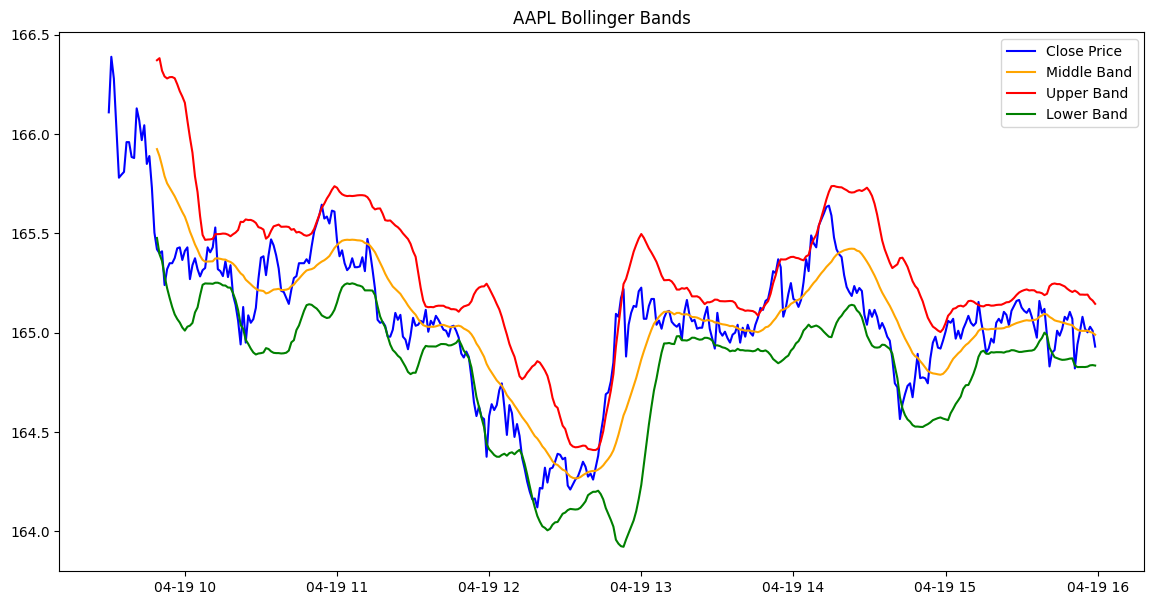

In [27]:
plot_bollinger_bands(ticker_symbol, data)
# plot_ma_ema(ticker_symbol, data, window=20)
# plot_rsi(ticker_symbol, data)
# plot_macd(ticker_symbol, data, window_short=12, window_long=26, signal_window=9)
# plot_volume(ticker_symbol, data)
# plot_candlestick_patterns(ticker_symbol, data)


In [28]:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [31]:
data = yf.download(ticker_symbol, interval='1m', period='1d')


[*********************100%%**********************]  1 of 1 completed


In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-19 09:30:00-04:00,166.119995,166.389999,165.789993,166.110001,166.110001,4844703
2024-04-19 09:31:00-04:00,166.145004,166.389999,165.619995,166.389893,166.389893,464845
2024-04-19 09:32:00-04:00,166.399994,166.399994,166.149994,166.279999,166.279999,175288
2024-04-19 09:33:00-04:00,166.270004,166.289993,165.949997,166.035004,166.035004,130712
2024-04-19 09:34:00-04:00,166.024994,166.129700,165.699997,165.780701,165.780701,147298
...,...,...,...,...,...,...
2024-04-19 15:55:00-04:00,165.080002,165.089996,164.960007,165.020004,165.020004,353605
2024-04-19 15:56:00-04:00,165.009995,165.050003,165.000000,165.001999,165.001999,270328
2024-04-19 15:57:00-04:00,165.009995,165.050003,164.979996,165.029999,165.029999,343397


In [34]:
import plotly.graph_objects as go

In [43]:
data = yf.download(ticker_symbol, interval='1m', period='1d')


[*********************100%%**********************]  1 of 1 completed


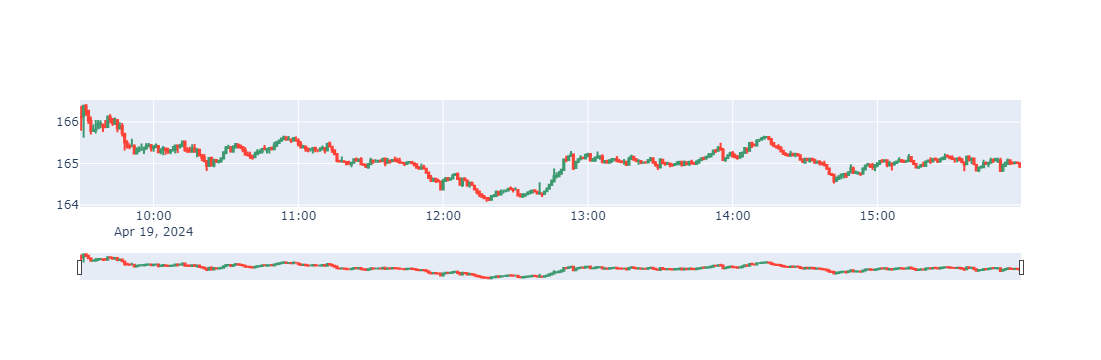

In [44]:
df = data
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()
